In the session that follows, I plan on exploring the famous Titanic dataset with the aim of putting together a submission on Kaggle.com. I have read through a couple of references, and I plan on combining the techniques to complete my submission. The first reference is from the DataQuest mission for kaggle competitions, and the second reference is a link I followed from BecomingADataScientist.com, which led me to a blog post/jupyter nb/github repo where the author scored .813 or so (top 10%!)

In [2]:
#remove warnings (not sure about this, but it seems to pop up often..)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [3]:
train_data = pd.read_csv('./data/train.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Need to address the missing data in the Age column. 

In [6]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#Converting the "Sex" column into numeric values, using 0 for males and 1 for females
train_data.loc[train_data['Sex'] == 'male', 'Sex'] = 0
train_data.loc[train_data['Sex'] == 'female', 'Sex'] = 1

In [8]:
train_data.head() #checking to make sure that worked!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Next up is converting the "Embarked" column, while filling any missing values (there are two)
train_data["Embarked"] = train_data["Embarked"].fillna("S")
train_data.loc[train_data["Embarked"] == "S", "Embarked"] = 0
train_data.loc[train_data["Embarked"] == "C", "Embarked"] = 1
train_data.loc[train_data["Embarked"] == "Q", "Embarked"] = 2

Next, I'll jump over to the tutorial by Ahmed Besbes, and add some visuals for exploratory analysis using matplotlib

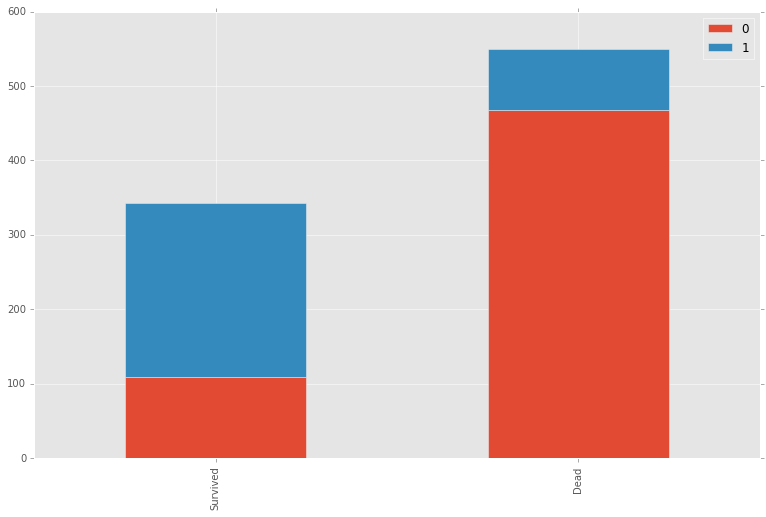

In [10]:
survived_sex = train_data[train_data['Survived'] == 1]['Sex'].value_counts()
dead_sex = train_data[train_data['Survived'] == 0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived', 'Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))

Remembering that 0 = female and 1 = male, we can see right away that women were far more likely to survive than men. Now lets see if there is a correlation to age. 

In [11]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
#Filling the NaN's in the age column, otherwise they will throw an error when creating the histogram below

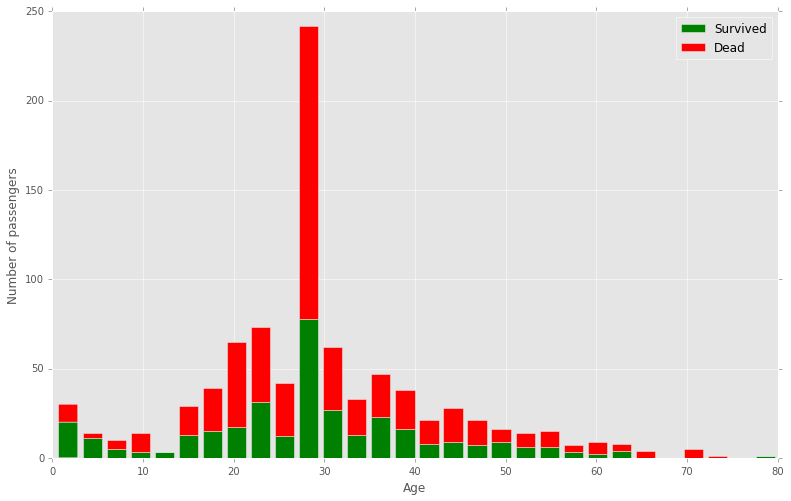

In [12]:
figure = plt.figure(figsize=(13,8))
plt.hist([train_data[train_data['Survived']==1]['Age'],train_data[train_data['Survived']==0]['Age']], bins=30, stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

Age definitely plays a part, so maybe we should do a better job of filling those NaN's, instead of just using a blanket median of all the values. 

Actually, at this point, I think I should split this up into two potential solutions. From here, I will continue using the DataQuest solution method - Ensemble of Random Forest, Decision Trees and Gradient Boosting

In [13]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold

/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [16]:
# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place 
# where a tree branch ends (the bottom points of the tree)

alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

In [17]:
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
kf = cross_validation.KFold(train_data.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, train_data[predictors], train_data['Survived'], cv=kf)

In [18]:
#Well, after some gymnastics, I got all my imports correct (and without a deprecation warning?)
print(scores.mean()) #This should be our first prediction score! 

0.785634118967


It worked! However, with the above parameters for min_samples_split and min_samples_leaf, we are in danger of overfitting to our training data. This can lead to overall poor performance of the model on the test data. Below, we will increase those params and see how that affects our score mean. 

In [19]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
kf = cross_validation.KFold(train_data.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, train_data[predictors], train_data['Survived'], cv=kf)
print(scores.mean())

0.81593714927


The tutorial goes on to some basic examples of feature engineering where they concatenate the SibSp and Parch columns to obtain overall family size, as well as creating a column for total name length. I'm not going to bother with those, because they don't end up being useful features. However, there is value in extracting each person's Title, so I will include that work. See below. (Almost there..!)

In [20]:
# We get to see our old friend - regular expressions!
import re
def get_title(name):
    # Use a regular expression to search for a title.  
    # Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(r' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [21]:
# Get all the titles and print how often each one occurs.
titles = train_data['Name'].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Jonkheer      1
Countess      1
Mme           1
Capt          1
Ms            1
Don           1
Sir           1
Name: Name, dtype: int64


In [22]:
# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v
#Verify that we mapped everything correctly.
print(pd.value_counts(titles))

1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [23]:
#Now we add the numerically converted Title column to our dataframe
train_data['Title'] = titles

The tutorial then goes on to create another feature called FamilyGroup combining family size with their last name. I don't know, this part never did make much sense, and doesn't seem to contribute to the solution, so I'm not going to bother. Now, we can use scikitlearn to select the best features from our dataframe. This is extremely helpful, I think.

In [24]:
#import a couple more modules from scikitlearn
from sklearn.feature_selection import SelectKBest, f_classif
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Title"] #edited with our new feature(s)

In [25]:
#perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(train_data[predictors], train_data['Survived'])

SelectKBest(k=5, score_func=<function f_classif at 0x119f0b048>)

In [26]:
# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

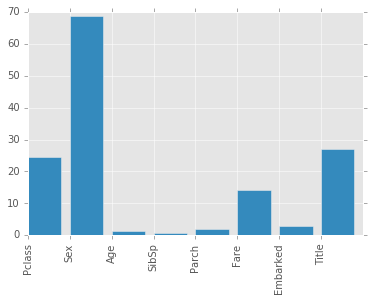

In [27]:
plt.bar(range(len(predictors)), scores) #plotting the predictors by their score - notice the obvious best features
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [28]:
#Select the best predictors, in this case, we have 4 clearcut winners
predictors = ['Pclass', 'Sex', 'Fare', 'Title']
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg, train_data[predictors], train_data['Survived'], cv=3)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.817059483726


Next up is Gradient Boosting, and then we'll ensemble our models to see if they help each other out to a better overall score. (Hint: They usually do)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [30]:
# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, 
# and everything with the gradient boosting classifier.

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "Title"]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "Title", "Age", "Embarked"]]
]

In [31]:
#initialize the cross validation folds
kf = cross_validation.KFold(train_data.shape[0], n_folds=3, random_state=1)

In [32]:
predictions = []
for train, test in kf:
    train_target = train_data["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(train_data[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(train_data[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

In [33]:
# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

In [34]:
# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == train_data["Survived"]]) / len(predictions)
print(accuracy)

0.81593714927


Now - it's time to apply this model to the test data and create our very first submission! So far, so good!

In [35]:
test_data = pd.read_csv('./data/test.csv')

In [46]:
# First, we'll add titles to the test set, and convert all the non-numeric columns to numeric features.
titles = test_data["Name"].apply(get_title)
test_data["Embarked"] = test_data["Embarked"].fillna("S")
test_data.loc[test_data["Embarked"] == "S", "Embarked"] = 0
test_data.loc[test_data["Embarked"] == "C", "Embarked"] = 1
test_data.loc[test_data["Embarked"] == "Q", "Embarked"] = 2
test_data.loc[test_data['Sex'] == 'male', 'Sex'] = 0 #combine these with the cell above. 
test_data.loc[test_data['Sex'] == 'female', 'Sex'] = 1
test_data.drop('Cabin', 1, inplace=True)
#going with a strict median for the age column again --BUT using the training data median age
test_data["Age"] = test_data["Age"].fillna(train_data["Age"].median())

TypeError: invalid type comparison

In [47]:
/# We're adding the Dona title to the mapping, because it's in the test set, but not the training set
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}
for k,v in title_mapping.items():
    titles[titles == k] = v
test_data["Title"] = titles
# Check the counts of each unique title.
print(pd.value_counts(test_data["Title"]))

1     240
2      79
3      72
4      21
7       2
6       2
10      1
5       1
Name: Title, dtype: int64


In [48]:
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "Title"]
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1), predictors]
]

In [50]:
test_data['Fare'] = test_data['Fare'].fillna(train_data['Fare'].median()) #discovered that this column has NaN's UGH!

In [51]:
#test_data.describe #finding that there are some frustrating little issues with the test data, namely a cabin column!
test_data[predictors].dtypes
test_data[predictors].isnull().any()

Pclass      False
Sex         False
Age         False
Fare        False
Embarked    False
Title       False
dtype: bool

In [52]:
full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(train_data[predictors], train_data["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(test_data[predictors].astype(np.float32))[:,1]
    full_predictions.append(predictions)

In [55]:
#Run this when all the errors above are cleared up... 
# The gradient boosting classifier generates better predictions, so we weight it higher.
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": predictions
    })

#next step is to then create a submission.csv file from this dataframe. 
submission.to_csv("CN_Titanic_sub.csv", index=False)

SUCCESS! I successfully debugged my model. It turns out, there were still some NaN's hiding out in the 'Fare' column. Once I sorted that out, everything finally went through to completion. My submission nets me a score of .78469 which is a fair bit better than a Gender, Price and Class based model (.7799). I'll take it! I can add to this when I switch over to following Ahmed's model a little more closely, or maybe I can create my own features for better success? Either way, I finally got something together! 